In [1]:
import pandas as pd

In [3]:
A=pd.read_csv("F:/data science workshop/DATA-SET/data/wage.csv")

In [4]:
A.head()

,Unnamed: 0,year,age,maritl,race,education,region,jobclass,health,health_ins,logwage,wage
0,231655,2006,18,1. Never Married,1. White,1. < HS Grad,2. Middle Atlantic,1. Industrial,1. <=Good,2. No,4.318063,75.043154
1,86582,2004,24,1. Never Married,1. White,4. College Grad,2. Middle Atlantic,2. Information,2. >=Very Good,2. No,4.255273,70.476020
2,161300,2003,45,2. Married,1. White,3. Some College,2. Middle Atlantic,1. Industrial,1. <=Good,1. Yes,4.875061,130.982177
3,155159,2003,43,2. Married,3. Asian,4. College Grad,2. Middle Atlantic,2. Information,2. >=Very Good,1. Yes,5.041393,154.685293
4,11443,2005,50,4. Divorced,1. White,2. HS Grad,2. Middle Atlantic,2. Information,1. <=Good,1. Yes,4.318063,75.043154


In [5]:
A=A.drop(labels=["year","logwage","Unnamed: 0"],axis=1)

In [6]:
A.head()

,age,maritl,race,education,region,jobclass,health,health_ins,wage
0,18,1. Never Married,1. White,1. < HS Grad,2. Middle Atlantic,1. Industrial,1. <=Good,2. No,75.043154
1,24,1. Never Married,1. White,4. College Grad,2. Middle Atlantic,2. Information,2. >=Very Good,2. No,70.476020
2,45,2. Married,1. White,3. Some College,2. Middle Atlantic,1. Industrial,1. <=Good,1. Yes,130.982177
3,43,2. Married,3. Asian,4. College Grad,2. Middle Atlantic,2. Information,2. >=Very Good,1. Yes,154.685293
4,50,4. Divorced,1. White,2. HS Grad,2. Middle Atlantic,2. Information,1. <=Good,1. Yes,75.043154


In [7]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
B=A.iloc[:,1:8]
B=B.apply(le.fit_transform)

In [8]:
B=B.join(A[["wage","age"]])

In [9]:
B

,maritl,race,education,region,jobclass,health,health_ins,wage,age
0,0,0,0,0,0,0,1,75.043154,18
1,0,0,3,0,1,1,1,70.476020,24
2,1,0,2,0,0,0,0,130.982177,45
3,1,2,3,0,1,1,0,154.685293,43
4,3,0,1,0,1,0,0,75.043154,50
5,1,0,3,0,1,1,0,127.115744,54
6,1,3,2,0,0,1,0,169.528538,44
7,0,2,2,0,1,0,0,111.720849,30
8,0,1,2,0,1,1,0,118.884359,41
9,1,0,1,0,1,1,0,128.680488,52


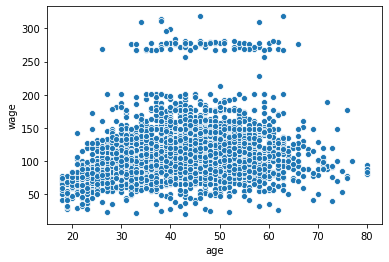

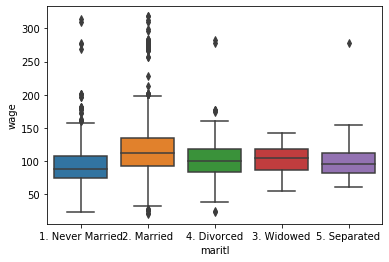

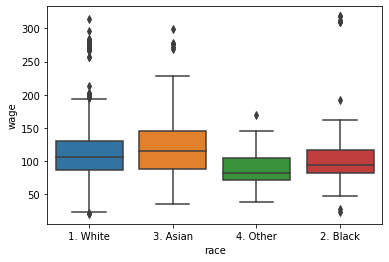

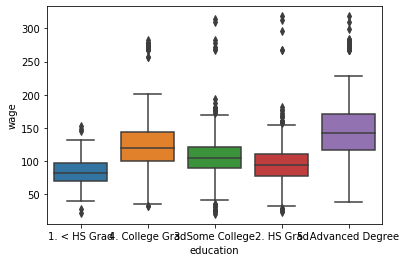

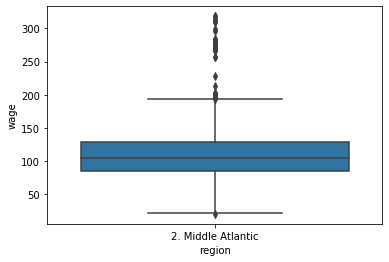

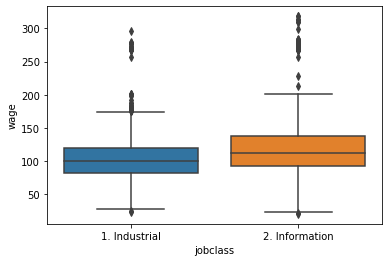

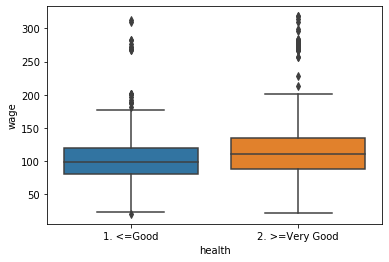

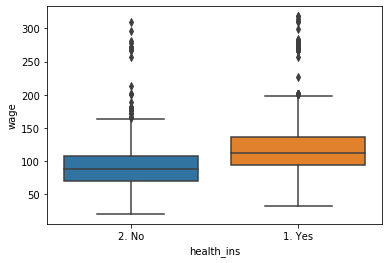

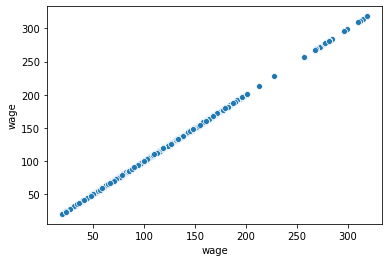

In [11]:
import matplotlib.pyplot as plt
import seaborn as sb
for i in A.columns:
    if(A[i].dtypes=="object"):
        sb.boxplot(A[i],A.wage)
        plt.show()
    else:
        sb.scatterplot(A[i],A.wage)
        plt.show()

In [12]:
X=B.drop(labels=["wage","region"],axis=1)
Y=B[["wage"]]
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(X,Y,test_size=0.2,random_state=30)

In [14]:
from sklearn.ensemble import RandomForestRegressor
rfr=RandomForestRegressor(random_state=40)
model=rfr.fit(xtrain,ytrain)
pred=model.predict(xtest)
from sklearn.metrics import mean_absolute_error,mean_squared_error
print("MSE is %.2f"%(mean_squared_error(ytest,pred)))
print("MAE is %.2f"%(mean_absolute_error(ytest,pred)))

MSE is 1493.50
MAE is 26.85


C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


<BarContainer object of 7 artists>

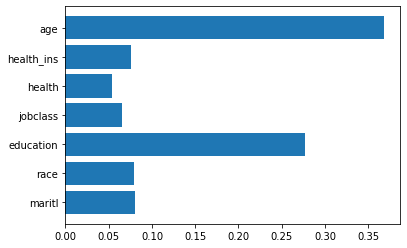

In [16]:
plt.barh(X.columns,model.feature_importances_)

In [17]:
for i in model.feature_importances_:
  print(i)

0.08003741511167996
0.07957340628403928
0.27678417327239224
0.06543892785817175
0.0534015995361359
0.07611689968129201
0.3686475782562889


In [18]:
from sklearn.ensemble import RandomForestRegressor
rfr=RandomForestRegressor(random_state=40,n_estimators=40)
from sklearn.model_selection import GridSearchCV
tp={"max_depth":range(2,20,1)}
cv=GridSearchCV(rfr,tp,scoring="neg_mean_squared_error",cv=3)
cvmodel=cv.fit(X,Y)
cvmodel.best_params_


C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was pa

{'max_depth': 6}

In [19]:
rfr=RandomForestRegressor(random_state=40,n_estimators=40,max_depth=6)
model=rfr.fit(xtrain,ytrain)
pred=model.predict(xtest)
from sklearn.metrics import mean_absolute_error,mean_squared_error
print("MSE is %.2f"%(mean_squared_error(ytest,pred)))
print("MAE is %.2f"%(mean_absolute_error(ytest,pred)))


MSE is 1282.16
MAE is 23.53


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


In [21]:
model.feature_importances_

array([0.06760605, 0.03231105, 0.52479657, 0.018417  , 0.02041131,
       0.14337185, 0.19308618])

In [22]:
X.columns

Index(['maritl', 'race', 'education', 'jobclass', 'health', 'health_ins',
       'age'],
      dtype='object')

In [27]:
W=pd.DataFrame(zip(X.columns,model.feature_importances_),columns=["Columns","Importances"])

In [25]:
W=W.sort_values(by="Importances")

In [28]:
W

,Columns,Importances
0,maritl,0.067606
1,race,0.032311
2,education,0.524797
3,jobclass,0.018417
4,health,0.020411
5,health_ins,0.143372
6,age,0.193086


<BarContainer object of 7 artists>

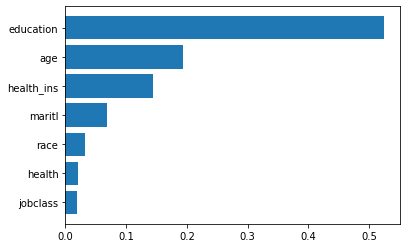

In [26]:
plt.barh(W.Columns,W.Importances)